In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score
import mglearn
from sklearn.metrics import silhouette_score

In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 군집 알고리즘 비교, 평가

#### target값으로 군집 평가
- ARI/ NMI : 군집이 최적일 때 점수를 1로 주고, 무작위로 분류된 군집일 경우 점수를 0으로 줌
- 군집 점수 : 0~1 사이 값
- ARI는 점수가 음수로 나올수도 있음

In [14]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

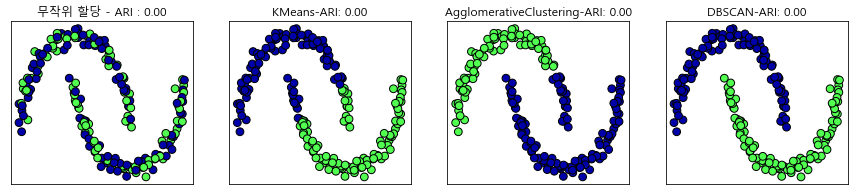

In [16]:
# 군집분석 알고리즘 모델 리스트
algo = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw = {'xticks':(),'yticks':()})

# 군집분석 알고리즘들과 비교를 위해 무작위로 클러스터 할당한 것
random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(low=0, high=2, size=len(x_scaled))

# 무작위로 할당한 클러스터 그림
axes[0].scatter(x_scaled[:,0],x_scaled[:,1], c=random_cluster, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI : {:.2f}'.format(adjusted_rand_score(y, random_cluster)))

for ax, algo in zip(axes[1:], algo):
    cluster = algo.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0],x_scaled[:,1],c=cluster, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{}-ARI: {:.2f}'.format(algo.__class__.__name__,adjusted_rand_score(y, random_cluster)))

In [18]:
cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]

print('{:.2f}'.format(accuracy_score(cluster1, cluster2)))
print('{:.2f}'.format(adjusted_rand_score(cluster1, cluster2)))

0.00
1.00


- 군집분석에서는 accuracy 사용하면 안됨
- ARI / NMI 사용

#### 실루엣 지수
- 정확하지 않음
- 클러스터의 밀집정도를 계산하는 값
- 점수가 높을수록 좋고 최대점수 = 1
- data가 복잡할 때는 밀집도를 활용한 점수가 잘 안맞음
- -1 : 완전 잘못된 군집, 0 : 중첩된 군집, 1 : 잘 구분된 군집

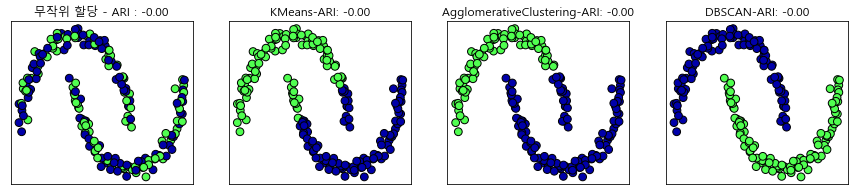

In [23]:
# 군집분석 알고리즘 모델 리스트
algo = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw = {'xticks':(),'yticks':()})

# 군집분석 알고리즘들과 비교를 위해 무작위로 클러스터 할당한 것
random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(low=0, high=2, size=len(x_scaled))

# 무작위로 할당한 클러스터 그림
axes[0].scatter(x_scaled[:,0],x_scaled[:,1], c=random_cluster, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI : {:.2f}'.format(silhouette_score(x_scaled, random_cluster)))

for ax, algo in zip(axes[1:], algo):
    cluster = algo.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0],x_scaled[:,1],c=cluster, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{}-ARI: {:.2f}'.format(algo.__class__.__name__, silhouette_score(x_scaled, random_cluster)))

- 군집모델이 안정적이거나 실루엣 점수가 높다고 하더라도, 군집에 어떤 유의미한 것이 있는지나 군집이 data의 흥미로운 feature를 반영하고 있는지 알 수 없음
- 실루엣 잘 작동 X